THIS IPYNB FILE DOES THE EDA AND ALSO LOOK FOR POTENTIAL FEATURE ENGINEERING METHODS THAT CAN BE DEPLOYED.


1. 'data' var contains original training data.
2. 'train' and 'test' are cleaned and processed subsets of this original 'data'.
3. 'x_train' , 'x_test' were used to perform PCA





#Libraries




In [ ]:
#!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f055f1744ccea920474fcd396f28503e65c5a470936da2ee3eee64f9ed4e9f73
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns

#from ydata_profiling import ProfileReport

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Data

In [ ]:
data=pd.read_csv("/content/train.csv")

In [ ]:
data.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


Columns

In [ ]:
data.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume', 'target'],
      dtype='object')

Describe

In [ ]:
data.describe()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,5.464300e+05,546430.000000,546430.000000,546430.000000,546430.000000,5.464300e+05,5.464300e+05,546429.000000,5.464290e+05,5.464290e+05,546429.000000
mean,1.541864e+09,0.409414,0.409755,0.409051,0.409406,5.546942e+04,2.248376e+04,43.039875,2.864280e+04,1.162585e+04,0.466939
std,9.464454e+06,0.122394,0.122543,0.122234,0.122385,1.171666e+05,5.234552e+04,65.125664,6.278036e+04,2.785406e+04,0.498906
min,1.525471e+09,0.247090,0.248720,0.246720,0.247270,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.533668e+09,0.313450,0.313580,0.313300,0.313450,1.154032e+04,4.258216e+03,13.000000,4.806800e+03,1.754118e+03,0.000000
50%,1.541864e+09,0.357630,0.358000,0.357250,0.357630,2.487155e+04,9.578125e+03,25.000000,1.235060e+04,4.689738e+03,0.000000
75%,1.550061e+09,0.472700,0.473140,0.472230,0.472730,5.211017e+04,2.087783e+04,48.000000,2.806180e+04,1.123359e+04,1.000000
max,1.558257e+09,0.934950,0.935000,0.930050,0.934960,6.741248e+06,4.977963e+06,3963.000000,3.351752e+06,2.084654e+06,1.000000


#EDA

## Check for missing values in complete data

In [ ]:
df=pd.DataFrame(data)
null=df.isnull().sum()
null

,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0
quote_asset_volume,0
number_of_trades,1
taker_buy_base_volume,1
taker_buy_quote_volume,1


drop Null (rows containing any null entry)

In [ ]:
data=df.dropna(axis=0, how="any")

In [ ]:
data.isnull().sum()

,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0
quote_asset_volume,0
number_of_trades,0
taker_buy_base_volume,0
taker_buy_quote_volume,0


## Train_Test split

I am splitting dataset early to avoid any stat. EDA on testing data (subset of tarining data provided..)


In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2,random_state=0)

In [ ]:
print(len(train))
print(len(test))

437143
109286


##Profile Report

In [ ]:
#profile = ProfileReport(train, title="EDA Report", explorative=True)

In [ ]:
#profile.to_notebook_iframe()

Feature set is highly correlated.
We can plot heatmap explicitely to see it


## Featureset correlations

<Axes: >

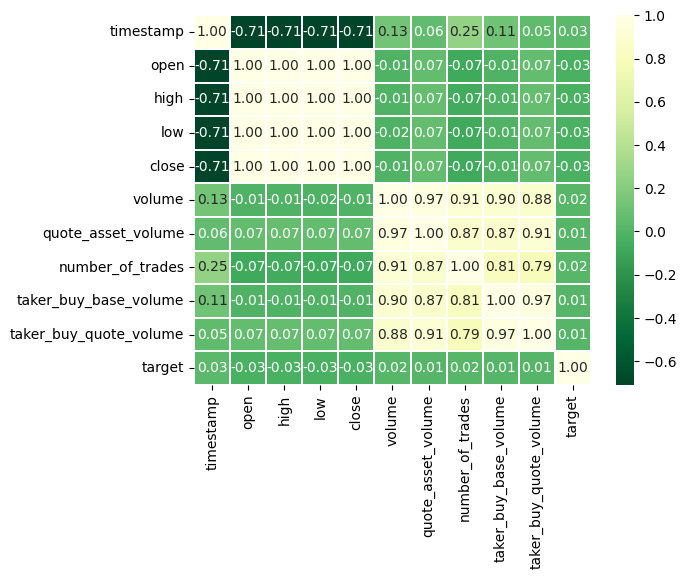

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap='YlGn_r',fmt='.2f',linewidth=0.1)

Indeed! The feature set is highly correlated we can use techniques to reduce this..

Infact "high", "low",and "close" features are perfectly correlated and hense add no new info to the feature space.


### VIF (Variance Inflation Factor)*italicized text*

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# any stats should be performed on training dataset.

X = train.drop('target', axis=1)
X = add_constant(X)
vif = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                   Feature            VIF
0                    const       0.000000
1                timestamp       2.505192
2                     open   90176.206624
3                     high  100653.470622
4                      low   96728.904522
5                    close   99763.718039
6                   volume     103.077276
7       quote_asset_volume     112.406518
8         number_of_trades       7.625949
9    taker_buy_base_volume     100.664682
10  taker_buy_quote_volume     114.471988


### Modify Features

Add, Drop ,Aggregate

I am removing columns "open", "high", "low", "close".

In [ ]:
# modifications on train and
train["mean"]=(train["high"]+train["low"]+train["close"])/3
train['volatility'] = (train['high'] - train['low']) / train['mean']

test["mean"]=(test["high"]+test["low"]+test["close"])/3
test['volatility'] = (test['high'] - test['low']) / test['mean']

train = train.drop(['open', 'high', 'low'], axis=1)
test = test.drop(['open', 'high', 'low'], axis=1)

<Axes: >

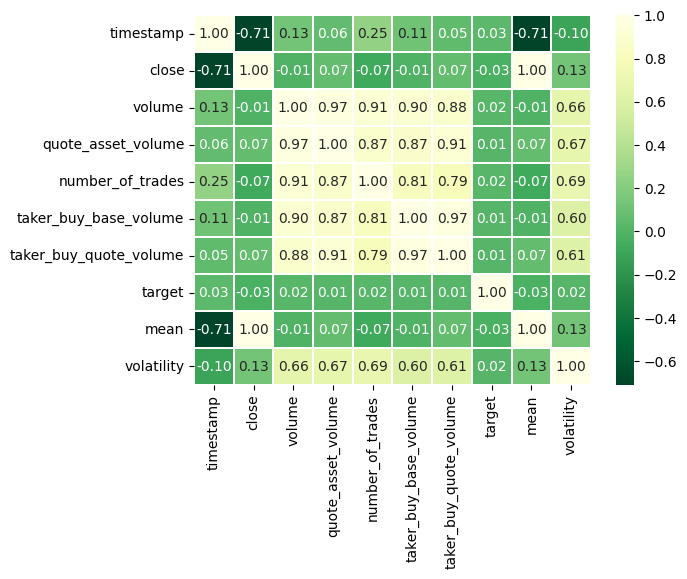

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap='YlGn_r',fmt='.2f',linewidth=0.1)

i'll further drop "close" feature bcause its perfectly correlated to "mean".

In [ ]:
train.drop("close",axis=1)
test.drop("close",axis=1)

,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,mean,volatility
20832,1526721180,229.29,153.068249,2.0,229.29,153.068249,0.0,0.667570,0.000539
447674,1552331700,8623.60,2670.889906,31.0,5246.00,1625.052235,1.0,0.309760,0.001162
369040,1547613660,20996.90,6796.318298,41.0,6225.00,2014.677970,1.0,0.323663,0.001236
408448,1549978140,7364.40,2224.489987,32.0,2363.30,713.919365,1.0,0.302007,0.000530
158143,1534959840,42194.40,13739.903573,21.0,18133.00,5905.539156,1.0,0.325420,0.001813
...,...,...,...,...,...,...,...,...,...
266392,1541454780,24649.40,12036.985420,15.0,10286.20,5024.191528,0.0,0.488310,0.000491
54925,1528766760,12057.80,7147.700280,9.0,2031.00,1205.317260,0.0,0.592920,0.001366
283769,1542497400,24814.70,12267.821620,22.0,18848.00,9317.556100,1.0,0.494257,0.001356
463174,1553261700,72324.70,22444.393919,59.0,19249.50,5972.084557,1.0,0.310233,0.001031


# 1. PCA and scaling

First we need to seperate the target var as well.

In [ ]:
x_train=train.drop("target",axis=1)
y_train=train["target"]

x_test=test.drop("target",axis=1)
y_test=test["target"]

In [ ]:
# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

PCA on train

In [ ]:
# Perform PCA
pca = PCA(n_components=4)  # Reduce to 4 components
principal_components = pca.fit_transform(x_train)
traindf=pd.DataFrame(data=principal_components,columns=['PC1','PC2','PC3','PC4'])

In [ ]:
pca.explained_variance_ratio_.sum() # the percentage of the variance


0.9609763186433881

PCA on train (only transform the features)

In [ ]:
principal_components_test=pca.transform(x_test)
testdf=pd.DataFrame(data=principal_components_test,columns=['PC1','PC2','PC3','PC4'])

Heatmap again..

<Axes: >

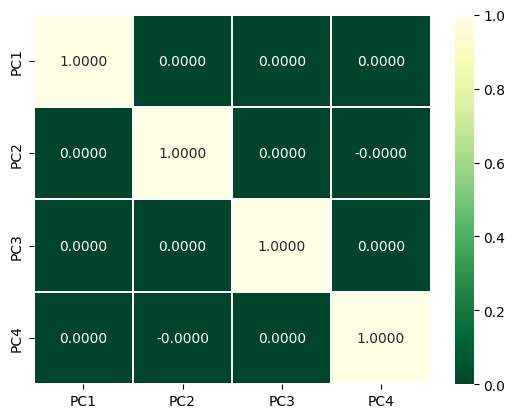

In [ ]:
sns.heatmap(traindf.corr(),annot=True,cmap='YlGn_r',fmt='.4f',linewidth=0.1)

## Test Algorithms for PCA

## Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()

# Fit the classifier to the training data
classifier_rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = classifier_rf.predict(x_test)

# Calculate accuracy and classification report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("accuracy: ",accuracy_rf)
print("classification report: ",classification_rep_rf)

accuracy:  0.5277528686199513
classification report:                precision    recall  f1-score   support

         0.0       0.55      0.64      0.59     58332
         1.0       0.49      0.40      0.44     50954

    accuracy                           0.53    109286
   macro avg       0.52      0.52      0.52    109286
weighted avg       0.52      0.53      0.52    109286

